# Alzheimer’s Risk Prediction Final Project 

In [5]:
!pip uninstall -y matplotlib-inline
!pip install matplotlib-inline==0.1.6

Found existing installation: matplotlib-inline 0.1.6
Uninstalling matplotlib-inline-0.1.6:
  Successfully uninstalled matplotlib-inline-0.1.6
  Using cached matplotlib_inline-0.1.6-py3-none-any.whl.metadata (2.8 kB)
Using cached matplotlib_inline-0.1.6-py3-none-any.whl (9.4 kB)

[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: pip install --upgrade pip


In [ ]:
%pip install --upgrade matplotlib-inline
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

#Loading the dataset 
alzheimers_df = pd.read_csv("alzheimers_disease_data_2.csv")

  Using cached matplotlib_inline-0.2.1-py3-none-any.whl (9.5 kB)
  Attempting uninstall: matplotlib-inline
    Found existing installation: matplotlib-inline 0.1.6
    Uninstalling matplotlib-inline-0.1.6:
      Successfully uninstalled matplotlib-inline-0.1.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
deepnote-toolkit 1.1.6 requires matplotlib-inline<0.2.0,>=0.1.7; python_version <= "3.10", but you have matplotlib-inline 0.2.1 which is incompatible.

[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


## Preprocessing Testing Data 

In [3]:
alzheimers_df.head()

NameError: name 'alzheimers_df' is not defined

In [4]:
len(alzheimers_df)

NameError: name 'alzheimers_df' is not defined

In [5]:
alzheimers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [6]:
alzheimers_df = alzheimers_df.drop(columns=['DoctorInCharge'])
alzheimers_df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,6.518877,0,0,1.725883,0,0,0,1,0,0
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,7.118696,0,0,2.592424,0,0,0,0,1,0
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,5.895077,0,0,7.119548,0,1,0,1,0,0
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,8.965106,0,1,6.481226,0,0,0,0,0,0
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,6.045039,0,0,0.014691,0,0,1,1,0,0


In [7]:
alzheimers_df.describe(include = 'all').T

,count,mean,std,min,25%,50%,75%,max
PatientID,2149.0,5825.000000,620.507185,4751.000000,5288.000000,5825.000000,6362.000000,6899.000000
Age,2149.0,74.908795,8.990221,60.000000,67.000000,75.000000,83.000000,90.000000
Gender,2149.0,0.506282,0.500077,0.000000,0.000000,1.000000,1.000000,1.000000
Ethnicity,2149.0,0.697534,0.996128,0.000000,0.000000,0.000000,1.000000,3.000000
EducationLevel,2149.0,1.286645,0.904527,0.000000,1.000000,1.000000,2.000000,3.000000
BMI,2149.0,27.655697,7.217438,15.008851,21.611408,27.823924,33.869778,39.992767
Smoking,2149.0,0.288506,0.453173,0.000000,0.000000,0.000000,1.000000,1.000000
AlcoholConsumption,2149.0,10.039442,5.757910,0.002003,5.139810,9.934412,15.157931,19.989293
PhysicalActivity,2149.0,4.920202,2.857191,0.003616,2.570626,4.766424,7.427899,9.987429
DietQuality,2149.0,4.993138,2.909055,0.009385,2.458455,5.076087,7.558625,9.998346


## EDA \(Data Pre Processing\)

In [8]:
#Rania imports 
import matplotlib as mpl
mpl.rc_file_defaults()
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:


#Rania
alzheimers_df.head()
alzheimers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [10]:
alzheimers_df.isnull().sum()
alzheimers_df.duplicated().sum()

0

In [11]:
alzheimers_df.describe(include ='all').T
alzheimers_df

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,6.518877,0,0,1.725883,0,0,0,1,0,0
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,7.118696,0,0,2.592424,0,0,0,0,1,0
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,5.895077,0,0,7.119548,0,1,0,1,0,0
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,8.965106,0,1,6.481226,0,0,0,0,0,0
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,6.045039,0,0,0.014691,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,6895,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,...,0.238667,0,0,4.492838,1,0,0,0,0,1
2145,6896,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,...,8.687480,0,1,9.204952,0,0,0,0,0,1
2146,6897,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,...,1.972137,0,0,5.036334,0,0,0,0,0,1
2147,6898,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,...,5.173891,0,0,3.785399,0,0,0,0,1,1



[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


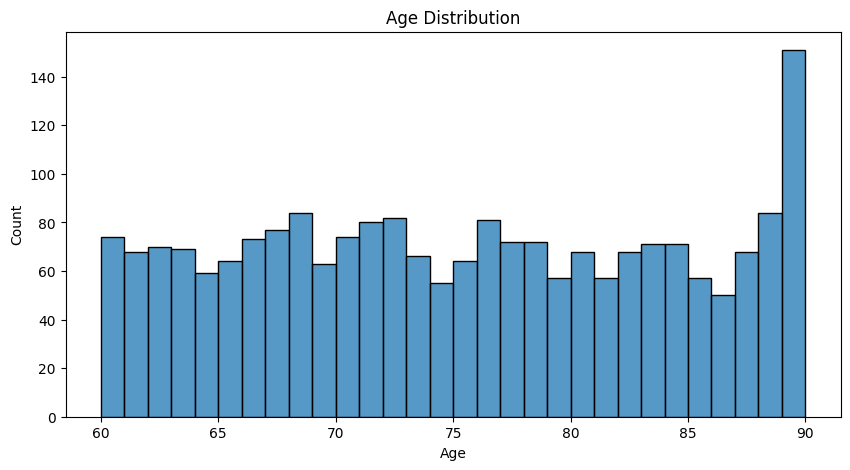

In [12]:
!pip install --upgrade matplotlib seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the age distribution
plt.figure(figsize=(10,5))
sns.histplot(alzheimers_df['Age'], bins=30)
plt.title('Age Distribution')
plt.show()

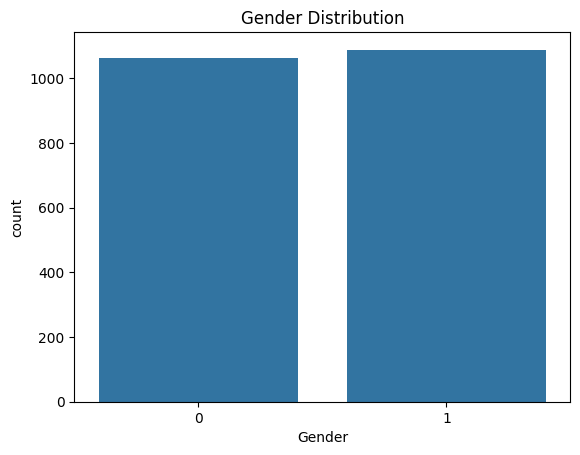

In [13]:
sns.countplot(x = 'Gender', data = alzheimers_df)
plt.title('Gender Distribution')
plt.show()

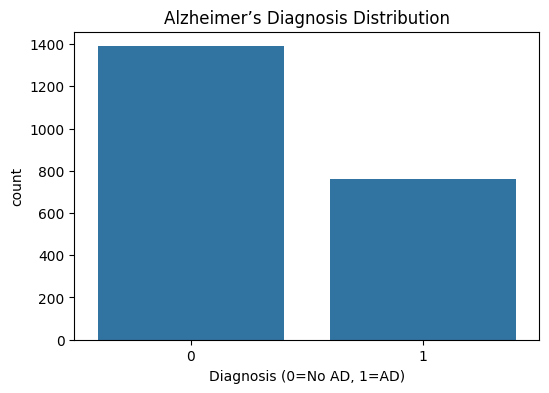

In [14]:
plt.figure(figsize=(6,4))
sns.countplot(x='Diagnosis', data=alzheimers_df)
plt.title('Alzheimer’s Diagnosis Distribution')
plt.xlabel('Diagnosis (0=No AD, 1=AD)')
plt.show()

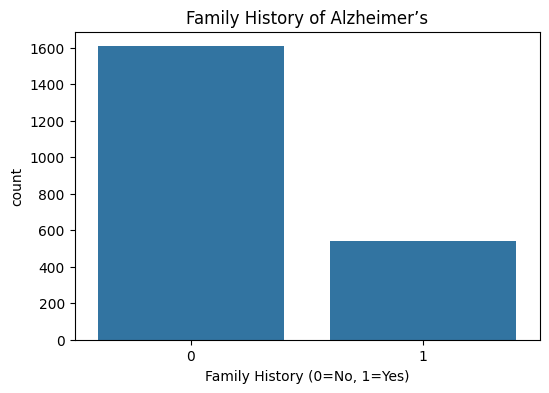

In [15]:
plt.figure(figsize=(6,4))
sns.countplot(x='FamilyHistoryAlzheimers', data=alzheimers_df)
plt.title('Family History of Alzheimer’s')
plt.xlabel('Family History (0=No, 1=Yes)')
plt.show()

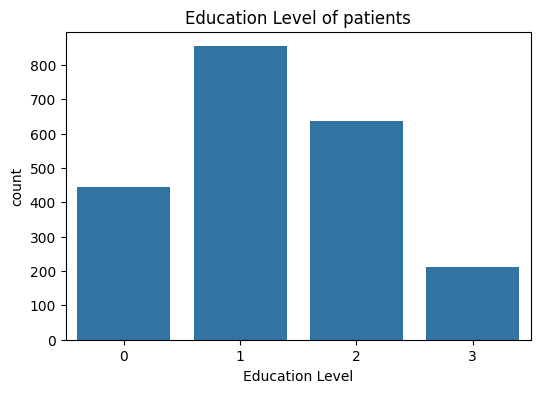

In [16]:
plt.figure(figsize=(6,4))
sns.countplot(x='EducationLevel', data=alzheimers_df)
plt.title('Education Level of patients')
plt.xlabel('Education Level')
plt.show()

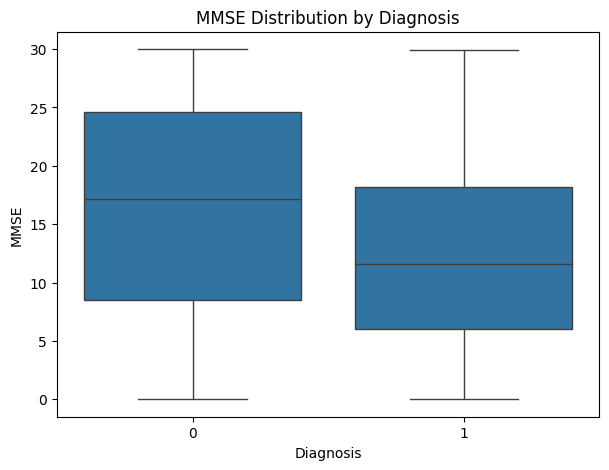

In [17]:
plt.figure(figsize=(7,5))
sns.boxplot(x='Diagnosis', y='MMSE', data=alzheimers_df)
plt.title('MMSE Distribution by Diagnosis')
plt.show()

MMSE is the Mini-mental state examination score so it makes sense that it is lower in patients with ALzheimer's diagnosis, so something to keep a track of in modeling.

In [18]:
for col in alzheimers_df.columns:
    try:
        alzheimers_df[col].astype(float)
    except:
        print("Non-numeric values detected in:", col)

In [19]:
alzheimers_df.duplicated().sum()

0

In [20]:
categorical_cols = [
    "Gender", "Ethnicity", "EducationLevel", 
    "Smoking", "FamilyHistoryAlzheimers", 
    "CardiovascularDisease", "Diagnosis"
]

for col in categorical_cols:
    alzheimers_df[col] = alzheimers_df[col].astype("category")

In [21]:
numeric_cols = alzheimers_df.select_dtypes(include=['int64','float64']).columns

for col in numeric_cols:
    alzheimers_df[col] = pd.to_numeric(alzheimers_df[col], errors="coerce")
numeric_cols

Index(['PatientID', 'Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity',
       'DietQuality', 'SleepQuality', 'Diabetes', 'Depression', 'HeadInjury',
       'Hypertension', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal',
       'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE',
       'FunctionalAssessment', 'MemoryComplaints', 'BehavioralProblems', 'ADL',
       'Confusion', 'Disorientation', 'PersonalityChanges',
       'DifficultyCompletingTasks', 'Forgetfulness'],
      dtype='object')

In [22]:
#checking missing values again
alzheimers_df.isna().sum()

PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfu

Text(0.5, 1.0, 'Age vs MMSE (with Regression Line)')

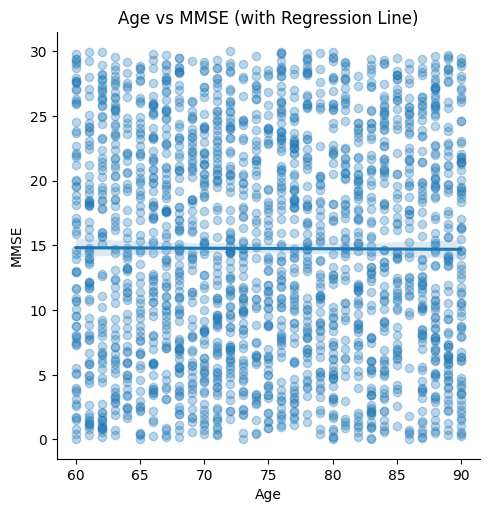

In [23]:
import numpy as np

alzheimers_df["MMSE_jitter"] = alzheimers_df["MMSE"] + np.random.normal(0, 0.3, len(alzheimers_df))
sns.lmplot(
    x="Age", 
    y="MMSE", 
    data=alzheimers_df,
    scatter_kws={'alpha':0.3}
)
plt.title("Age vs MMSE (with Regression Line)")

In [24]:










alzheimers_df["Age"].corr(alzheimers_df["MMSE"])

-0.004234771200121294

It looks like MMSE and age are not correlated at all, the graphs above give us evidence\. So let us see MMSE versus other categorical variables:

<Axes: xlabel='CholesterolTotal', ylabel='MMSE'>

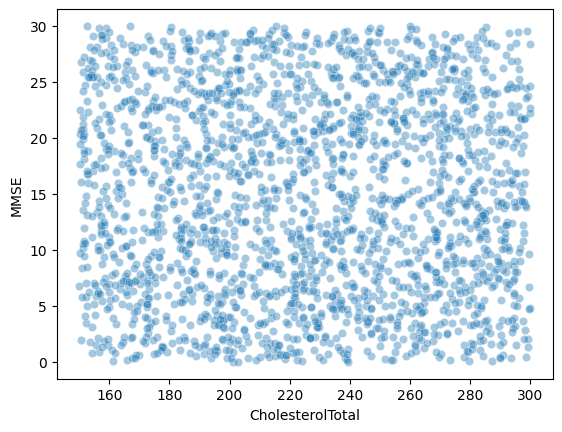

In [25]:




sns.scatterplot(x="CholesterolTotal", y="MMSE", data=alzheimers_df, alpha=0.4)

<Axes: xlabel='SystolicBP', ylabel='MMSE'>

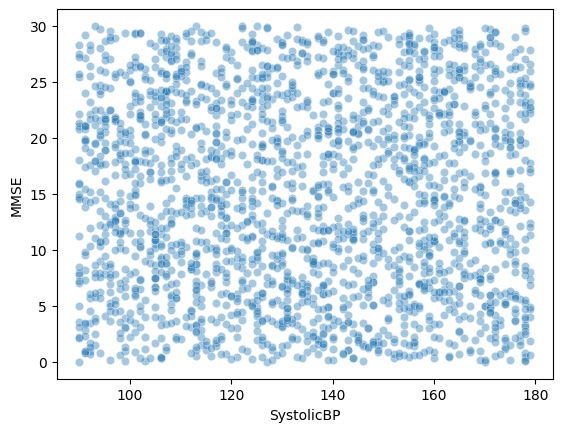

In [26]:

sns.scatterplot(x="SystolicBP", y="MMSE", data=alzheimers_df, alpha=0.4)

<Axes: xlabel='BMI', ylabel='MMSE'>

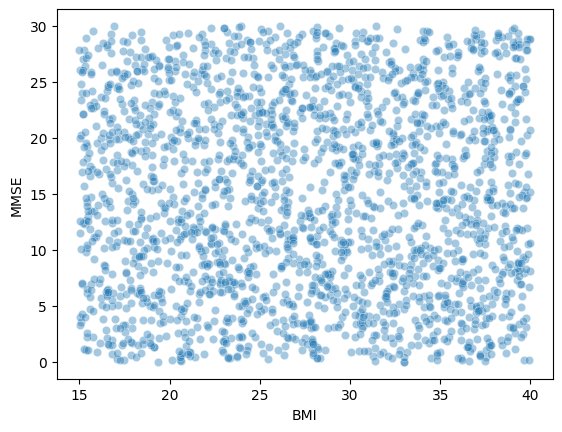

In [27]:



sns.scatterplot(x="BMI", y="MMSE", data=alzheimers_df, alpha=0.4)

In [28]:





alzheimers_df[['MMSE','MemoryComplaints','Disorientation','Confusion','Forgetfulness']].corr()

,MMSE,MemoryComplaints,Disorientation,Confusion,Forgetfulness
MMSE,1.000000,0.007652,0.036715,0.003763,0.011848
MemoryComplaints,0.007652,1.000000,0.013442,-0.007749,-0.006961
Disorientation,0.036715,0.013442,1.000000,0.007034,-0.032013
Confusion,0.003763,-0.007749,0.007034,1.000000,0.010100
Forgetfulness,0.011848,-0.006961,-0.032013,0.010100,1.000000


<Axes: xlabel='Diagnosis', ylabel='BMI'>

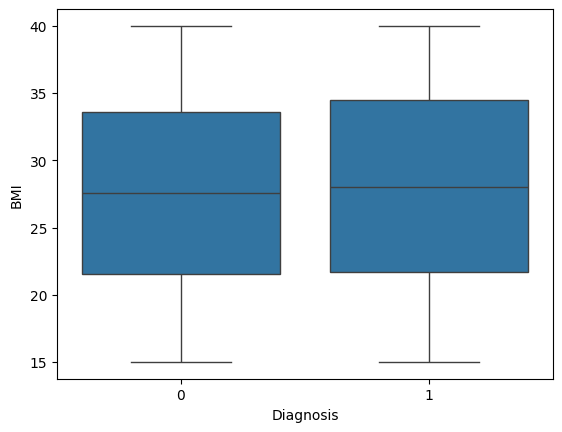

In [29]:


sns.boxplot(x="Diagnosis", y="BMI", data=alzheimers_df)

Text(0.5, 0, 'Smoking (0=Non-smoker, 1=Smoker)')

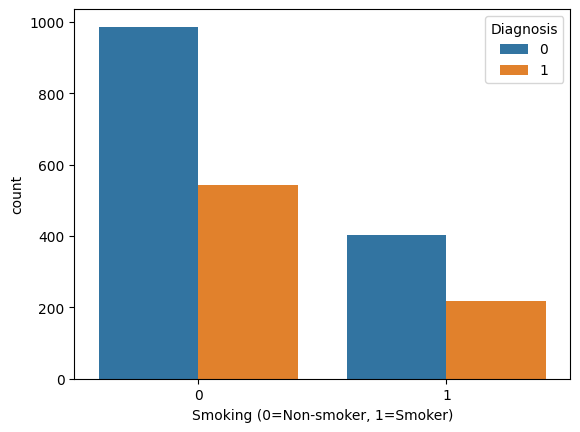

In [30]:


sns.countplot(x="Smoking", hue="Diagnosis", data=alzheimers_df)
plt.xlabel("Smoking (0=Non-smoker, 1=Smoker)")

Okay so we see some trend over here with smoking\- people who do not smoke seem to have been diagnosed more than people who do smoke which seems counterintuitive but there might be something here\.

<Axes: xlabel='Diagnosis', ylabel='FunctionalAssessment'>

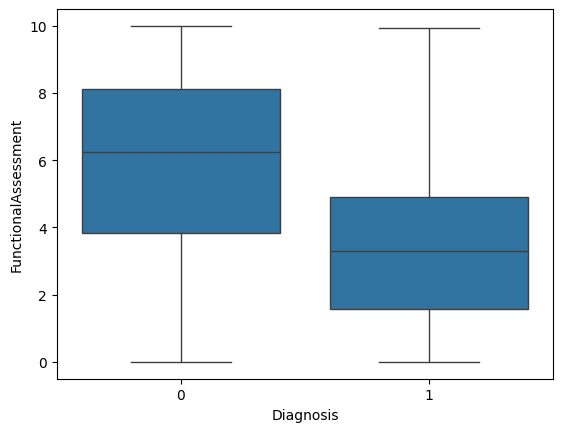

In [31]:


sns.boxplot(x="Diagnosis", y="FunctionalAssessment", data=alzheimers_df)

The plot above shows us lower FunctionalAssessment score (which seems to be from 0-10) for those diagnosed with Alzheimer's.

In [32]:


alzheimers_df["FunctionalAssessment"].describe()

count    2149.000000
mean        5.080055
std         2.892743
min         0.000460
25%         2.566281
50%         5.094439
75%         7.546981
max         9.996467
Name: FunctionalAssessment, dtype: float64

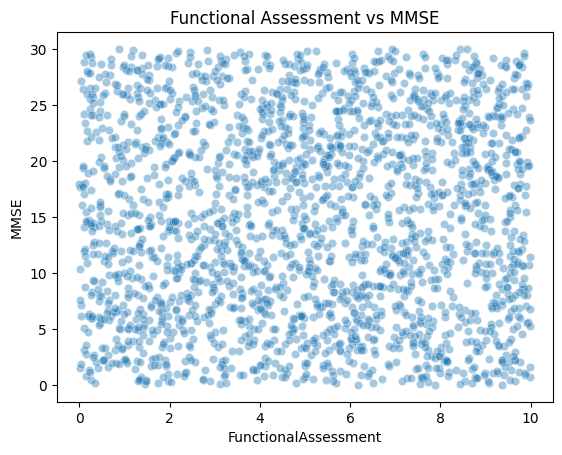

In [33]:


sns.scatterplot(x="FunctionalAssessment", y="MMSE", data=alzheimers_df, alpha=0.4)
plt.title("Functional Assessment vs MMSE")
plt.show()

In [34]:

alzheimers_df["FunctionalAssessment"].corr(alzheimers_df["MMSE"])

0.024932154455976123

<Axes: >

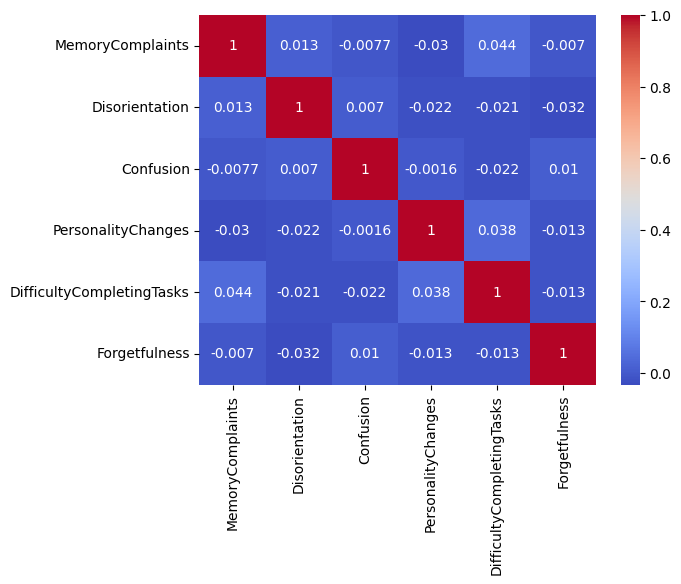

In [35]:
symptom_cols = [
    "MemoryComplaints", "Disorientation", "Confusion",
    "PersonalityChanges", "DifficultyCompletingTasks", "Forgetfulness"
]

sns.heatmap(alzheimers_df[symptom_cols].corr(), annot=True, cmap="coolwarm")


<Axes: xlabel='MemoryComplaints', ylabel='MMSE'>

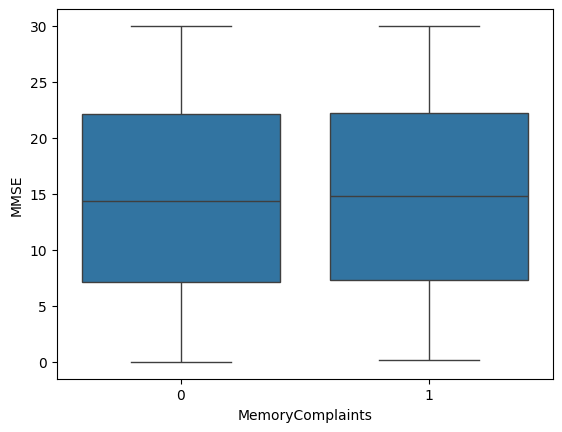

In [36]:


sns.boxplot(x="MemoryComplaints", y="MMSE", data=alzheimers_df)

<Axes: xlabel='Diagnosis', ylabel='ADL'>

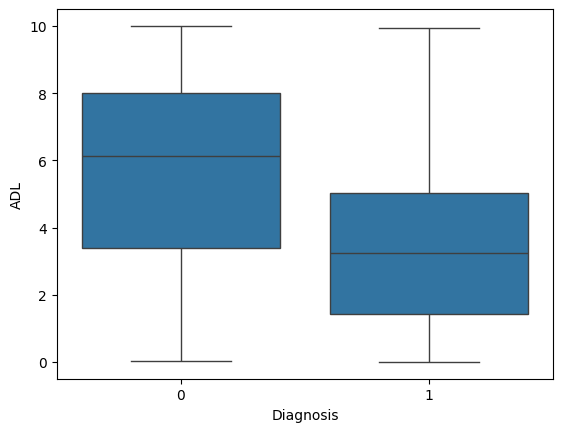

In [37]:






sns.boxplot(y="ADL", x="Diagnosis", data=alzheimers_df)

This plot is interesting because out of all the scores that measure quality of living, ADL (activaties of Daily Living) show a marked difference between diagnosed and undiagnosed individuals i.e., diagnosed individuals have a lower ADL score.

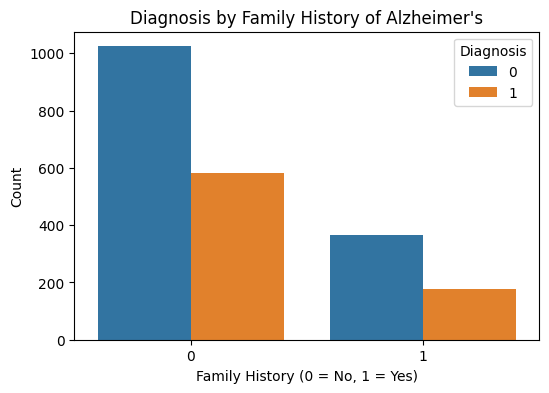

In [38]:






plt.figure(figsize=(6,4))
sns.countplot(
    x="FamilyHistoryAlzheimers",
    hue="Diagnosis",
    data=alzheimers_df
)
plt.title("Diagnosis by Family History of Alzheimer's")
plt.xlabel("Family History (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

In [39]:







pd.crosstab(alzheimers_df["FamilyHistoryAlzheimers"], alzheimers_df["Diagnosis"])

Diagnosis,0,1
FamilyHistoryAlzheimers,,
0,1024,583
1,365,177


## Summary so far:

The dataset contains 2,149 observations and 34 variables describing demographic, clinical, cognitive, and behavioral features related to Alzheimer’s disease\. Diagnosis is a binary outcome indicating whether a participant has Alzheimer’s\.

- Although cognitive scores typically decline with age in real clinical populations, this dataset appears to include only older adults \(ages 60\+\), making it harder to observe age\-related variation\. 

- The scatterplot of FunctionalAssessment, SystolicBP, Age, BMI, CholesterolTotal vs MMSE also exhibits a dense, uniform cloud of points with no discernible structure or slope\. This is good in that the points do not have a high chance of exhibiting bias, however, it also means it is harder to discern a trend\- which is what we're trying to figure out with this project\.

- It would be interesting to look at all the different cognitive scores and try to see if that helps predict the Alzheimer's diagnoses because the other categorical variables don't seem as consistent\.

## Feature Engineering

First reloading data so that it is easier to run the feature engineering and test split code

In [40]:
alzheimers_df = pd.read_csv("alzheimers_disease_data_2.csv")

In [41]:

alzheimers_df["Lifestyle"] = (alzheimers_df["PhysicalActivity"] + alzheimers_df["SleepQuality"]
                                     + alzheimers_df["DietQuality"])
alzheimers_df["CardiovascularRisk"] = (alzheimers_df["BMI"] * 0.4 + alzheimers_df["CholesterolTotal"] * 0.4 +
                              alzheimers_df["SystolicBP"] * 0.2)
alzheimers_df["DailyLivingImpairment"] = (alzheimers_df['DifficultyCompletingTasks'] + 
                    alzheimers_df['Forgetfulness'] + alzheimers_df['Disorientation'] + alzheimers_df['Confusion'])
alzheimers_df['CognitiveRisk'] = (alzheimers_df['MMSE'] * 0.5 + 
                    alzheimers_df['FunctionalAssessment'] * 0.3 + alzheimers_df['ADL'] * 0.2)

## Models 

### Test Split, we can change the code for this during the meeting

In [42]:

X = alzheimers_df.drop(columns=["Diagnosis", "PatientID", "DoctorInCharge"])
y = alzheimers_df["Diagnosis"]

# test split for ALL models
# Need to use stratify as classes are imbalanced 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

### Baseline Model 1: Logistic Regression

In [43]:
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)

log_pred = log_model.predict(X_test)

log_acc = accuracy_score(y_test, log_pred)
tn, fp, fn, tp = confusion_matrix(y_test, log_pred).ravel()
log_TPR = tp / (tp + fn)
log_FPR = fp / (fp + tn)
log_PRE = tp / (tp + fp) if (tp + fp) > 0 else 0

#cross-validation - Jacqui
#scaled to fix convergence warning
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('log', LogisticRegression(max_iter=1000, random_state=42))
])
log_scores = cross_val_score(log_model,X, y, cv=5, scoring='accuracy')

print(f"Logistic Regression: ")
print(f"Accuracy: {log_acc:.4f}")
print(f"TPR: {log_TPR:.4f}")
print(f"FPR: {log_FPR:.4f}")
print(f"Precision: {log_PRE:.4f}")
print('Cross-validation scores:', log_scores)
print(f'Mean accuracy: {np.mean(log_scores):.4f}')
print(f'Std Dev of accuracy: {np.std(log_scores):.4f}')

/root/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/root/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

### Baseline 2: Dummy Classifier 

In [44]:
dummy_model = DummyClassifier(strategy="most_frequent", random_state=42)
dummy_model.fit(X_train, y_train)
dummy_pred = dummy_model.predict(X_test)

dummy_acc = accuracy_score(y_test, dummy_pred)
tn, fp, fn, tp = confusion_matrix(y_test, dummy_pred).ravel()
dummy_TPR = tp / (tp + fn) if (tp + fn) > 0 else 0
dummy_FPR = fp / (fp + tn) if (fp + tn) > 0 else 0
dummy_PRE = tp / (tp + fp) if (tp + fp) > 0 else 0

print(f"Dummy Classifier (Majority Class):")
print(f"Accuracy: {dummy_acc:.4f}")
print(f"TPR: {dummy_TPR:.4f}")
print(f"FPR: {dummy_FPR:.4f}")
print(f"Precision: {dummy_PRE:.4f}")

Dummy Classifier (Majority Class):
Accuracy: 0.6465
TPR: 0.0000
FPR: 0.0000
Precision: 0.0000


In [45]:

from sklearn.metrics import accuracy_score, classification_report
'''
alzheimers_df["Lifestyle"] = (alzheimers_df["PhysicalActivity"] + alzheimers_df["SleepQuality"]
                              + alzheimers_df["DietQuality"])
alzheimers_df["CardiovascularRisk"] = (alzheimers_df["BMI"] * 0.4 + alzheimers_df["CholesterolTotal"] * 0.4 +
                                     alzheimers_df["SystolicBP"] * 0.2)

main_features = ["Age", "Gender", "Ethnicity", "EducationLevel","FamilyHistoryAlzheimers", 
                "CardiovascularDisease", "Hypertension", "Diabetes","Depression", "HeadInjury",
                "MMSE", "FunctionalAssessment", "MemoryComplaints",
                "BehavioralProblems", "ADL", "Confusion", "Disorientation",
                "PersonalityChanges", "DifficultyCompletingTasks", "Forgetfulness","SystolicBP",
                "DiastolicBP","CholesterolTotal","Lifestyle", "CardiovascularRisk"]
X = alzheimers_df[main_features]
Y = alzheimers_df["Diagnosis"]
'''
main_features = ["Age", "Gender", "Ethnicity", "EducationLevel","FamilyHistoryAlzheimers", 
                "CardiovascularDisease", "Hypertension", "Diabetes","Depression", "HeadInjury",
                "MMSE", "FunctionalAssessment", "MemoryComplaints",
                "BehavioralProblems", "ADL", "Confusion", "Disorientation",
                "PersonalityChanges", "DifficultyCompletingTasks", "Forgetfulness","SystolicBP",
                "DiastolicBP","CholesterolTotal","Lifestyle", "CardiovascularRisk"]
X_train_rf = X_train[main_features]
X_test_rf = X_test[main_features]
model_rf = RandomForestClassifier(n_estimators = 300,
                               max_depth = 6, 
                               max_features = 0.6,
                               min_samples_split = 5,
                               min_samples_leaf = 4,
                               class_weight = 'balanced',
                               random_state = 42)
model_rf.fit(X_train_rf, y_train)
y_pred_rf = model_rf.predict(X_test_rf) 
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

rf_scores = cross_val_score(model_rf,X[main_features], y, cv=5, scoring='accuracy')
print('Cross-validation scores:', rf_scores)
print(f'Mean accuracy: {np.mean(rf_scores):.4f}')
print(f'Std Dev of accuracy: {np.std(rf_scores):.4f}')

Random Forest Accuracy: 0.9534883720930233

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96       278
           1       0.95      0.92      0.93       152

    accuracy                           0.95       430
   macro avg       0.95      0.95      0.95       430
weighted avg       0.95      0.95      0.95       430

Cross-validation scores: [0.99069767 0.98372093 0.98372093 0.99534884 0.81585082]
Mean accuracy: 0.9539
Std Dev of accuracy: 0.0691


### Model 2: SVM

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

'''
X = alzheimers_df.drop(columns=["Diagnosis", "PatientID"])
y = alzheimers_df["Diagnosis"].astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
'''
# Dropping Feature Engineered columns
# nf = no feature engineering
X_train_nf = X_train.drop(columns=["Lifestyle", "CardiovascularRisk", "DailyLivingImpairment", "CognitiveRisk"])
X_test_nf = X_test.drop(columns=["Lifestyle", "CardiovascularRisk", "DailyLivingImpairment", "CognitiveRisk"])

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_nf)
X_test_scaled = scaler.transform(X_test_nf)

svm_clf = SVC(kernel='rbf', C=1, gamma='scale')
svm_clf.fit(X_train_scaled, y_train)

y_pred_svm = svm_clf.predict(X_test_scaled)

#cross-validation - Jacqui
#scaled it to inside the CV folds to prevent data leaks
#I also removed the same columns from above to keep consistent features
X_nf = X.drop(columns=["Lifestyle", "CardiovascularRisk", "DailyLivingImpairment", "CognitiveRisk"])

svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='rbf', C=1, gamma='scale'))
])
svm_scores = cross_val_score(svm_pipeline, X_nf, y, cv=5, scoring='accuracy')

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))
print('Cross-validation scores:', svm_scores)
print(f'Mean accuracy: {np.mean(svm_scores):.4f}')
print(f'Std Dev of accuracy: {np.std(svm_scores):.4f}')

SVM Accuracy: 0.8348837209302326

Confusion Matrix:
 [[249  29]
 [ 42 110]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88       278
           1       0.79      0.72      0.76       152

    accuracy                           0.83       430
   macro avg       0.82      0.81      0.82       430
weighted avg       0.83      0.83      0.83       430

Cross-validation scores: [0.86511628 0.85813953 0.85348837 0.85581395 0.74592075]
Mean accuracy: 0.8357
Std Dev of accuracy: 0.0451


### Model 3: Gradient Boosting

In [47]:

'''
alzheimers_df['CognitiveRisk'] = (alzheimers_df['MMSE'] * 0.5 + 
                    alzheimers_df['FunctionalAssessment'] * 0.3 + alzheimers_df['ADL'] * 0.2)

alzheimers_df['DailyLivingImpairment'] = (alzheimers_df['DifficultyCompletingTasks'] + 
                    alzheimers_df['Forgetfulness'] + alzheimers_df['Disorientation'] + alzheimers_df['Confusion'])

alzheimers_df["Lifestyle"] = (alzheimers_df["PhysicalActivity"] + alzheimers_df["SleepQuality"]
                                     + alzheimers_df["DietQuality"] + alzheimers_df['Smoking'] + alzheimers_df['AlcoholConsumption'])

##features for GB 
gb_features = ['Age', 'Gender', 'Ethnicity', 'EducationLevel', 
            'FamilyHistoryAlzheimers', 'Diabetes', 'Hypertension', 'CardiovascularDisease', 'Depression', 'HeadInjury',
            'BMI', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
            'MMSE', 'FunctionalAssessment', 'ADL',
            'MemoryComplaints', 'Disorientation', 'Confusion', 'DifficultyCompletingTasks', 'Forgetfulness',
            'CognitiveRisk', 'DailyLivingImpairment', 'Lifestyle']

X = alzheimers_df[gb_features]
y = alzheimers_df['Diagnosis']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
'''



from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV



gb = GradientBoostingClassifier(random_state=42)

param_grid = {
    'n_estimators': [150, 250],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3],
    'subsample': [0.8, 1.0], 
    'min_samples_leaf': [2,4]

}

grid = GridSearchCV(gb, param_grid, cv=5, scoring='recall_macro') 

grid.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [0.05, 0.1], 'max_depth': [3],
                         'min_samples_leaf': [2, 4], 'n_estimators': [150, 250],
                         'subsample': [0.8, 1.0]},
             scoring='recall_macro')

In [48]:
print(grid.best_params_)

{'learning_rate': 0.05, 'max_depth': 3, 'min_samples_leaf': 2, 'n_estimators': 150, 'subsample': 1.0}


In [97]:
best_gb = grid.best_estimator_

y_pred_gb = best_gb.predict(X_test)

#cross-validation - Jacqui
best_index = grid.best_index_
gb_scores = [grid.cv_results_[f'split{i}_test_score'][best_index] for i in range(5)]

print('Gradient Boosting Accuracy:', accuracy_score(y_test, y_pred_gb))
print('\nClassification Report:\n', classification_report(y_test, y_pred_gb))
print('\nConfusion Matric:\n', confusion_matrix(y_test, y_pred_gb))
print('\nCross-validation scores:\n', gb_scores)
print(f'Mean accuracy: {np.mean(gb_scores):.4f}')
print(f'Std Dev of accuracy: {np.std(gb_scores):.4f}')

Gradient Boosting Accuracy: 0.9488372093023256

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       278
           1       0.93      0.92      0.93       152

    accuracy                           0.95       430
   macro avg       0.95      0.94      0.94       430
weighted avg       0.95      0.95      0.95       430


Confusion Matric:
 [[268  10]
 [ 12 140]]

Cross-validation scores:
 [0.9343660823481451, 0.9428444838280904, 0.9496012405848472, 0.9141559592379265, 0.959813118904028]
Mean accuracy: 0.9402
Std Dev of accuracy: 0.0154


In [1]:
#CV Results
cv_results_df = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "SVM", "Gradient Boosting"],
    "Mean Accuracy": [
        log_scores.mean(),
        rf_scores.mean(),
        svm_scores.mean(),
        gb_scores.mean()
    ],
    "Std Dev": [
        log_scores.std(),
        rf_scores.std(),
        svm_scores.std(),
        gb_scores.std()
    ]
})

print(cv_results_df)

NameError: name 'pd' is not defined